In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
chems_pd = pd.read_csv("/content/sample_data/Chemical Composion of Ceramic.csv",
                       sep = ",")

In [ ]:
chems_pd

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,DY-M-3-g,Glaze,0.34,0.55,12.37,70.70,5.33,8.06,0.06,1.61,1250,10,90,30,250,520,30,140,690
84,DY-QC-1-g,Glaze,0.72,0.34,12.20,72.19,6.19,6.06,0.04,1.27,1700,60,110,10,270,540,40,120,630
85,DY-QC-2-g,Glaze,0.23,0.24,12.99,71.81,5.25,7.15,0.05,1.29,750,40,100,0,240,470,40,120,480
86,DY-QC-3-g,Glaze,0.14,0.46,12.62,69.16,4.34,11.03,0.05,1.20,920,40,90,20,230,470,40,130,1100


In [ ]:
Counter(chems_pd['Part'])

Counter({'Body': 44, 'Glaze': 44})

In [ ]:
chems_body = chems_pd[chems_pd['Part'] == 'Body']

In [ ]:
chems_body = chems_body.drop(['Part'], axis=1)

In [ ]:
chems_glaze = chems_pd[chems_pd['Part'] == 'Glaze']

In [ ]:
chems_glaze = chems_glaze.drop(['Part'], axis=1)

Separamos el atributo del nombre de la cerámica, tanto para el cuerpo como la cubierta.


In [ ]:
ceramic_name_body = chems_body['Ceramic Name']
chems_body = chems_body.drop(['Ceramic Name'], axis=1)

In [ ]:
chems_body

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
5,0.62,0.18,18.82,73.79,4.28,0.30,0.04,0.96,350,20,80,10,390,10,40,80,130
6,0.45,0.33,17.65,74.99,3.53,0.70,0.07,1.28,650,20,90,90,410,30,30,90,140
7,0.59,0.45,21.42,71.46,3.47,0.35,0.05,1.20,500,10,70,50,380,70,40,80,440
8,0.42,0.53,23.12,67.41,3.81,0.74,0.16,2.81,340,40,120,30,370,20,30,150,180
9,0.56,0.49,19.86,72.00,4.51,0.25,0.23,1.10,330,20,70,20,350,10,40,130,150


In [ ]:
ceramic_name_glaze = chems_glaze['Ceramic Name']
chems_glaze = chems_glaze.drop(['Ceramic Name'], axis=1)

In [ ]:
chems_glaze

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
44,0.97,0.07,11.42,74.41,5.70,5.34,0.05,1.04,550,20,60,20,310,150,20,50,390
45,1.46,0.47,12.96,68.79,4.85,8.88,0.11,1.49,950,30,40,0,350,250,30,60,840
46,1.05,0.23,13.64,69.90,4.46,8.43,0.07,1.22,590,20,90,40,370,90,40,80,460
47,0.14,0.41,12.42,67.24,4.29,12.86,0.06,1.58,960,80,70,40,330,160,40,70,1000
48,0.37,1.03,13.15,68.98,5.58,7.91,0.08,1.90,800,60,120,0,320,80,40,80,1080
49,1.09,0.50,13.47,68.51,5.97,7.23,0.19,2.05,870,20,50,40,360,240,20,100,870
50,1.16,0.58,13.83,71.37,5.14,5.99,0.08,0.85,1050,60,90,20,380,240,40,100,670
51,1.01,0.10,11.84,71.13,3.84,9.40,0.10,1.58,520,40,50,40,180,160,30,70,1610
52,1.88,0.58,12.95,67.58,2.98,10.28,0.12,2.61,590,80,90,30,230,190,20,90,690
53,0.73,0.25,13.00,71.01,5.78,6.43,0.10,1.71,1090,40,70,20,330,180,30,80,990


Tomando en cuenta la publicación:

https://doi.org/10.1016/j.ceramint.2015.12.030

Se muestran los atributos por orden de importancia, entonces se procede a seleccionar lo primeros 4 atributos de cada conjunto de datos para realizar LOF en cada uno de los dos conjuntos.

Primero tomamos los cuatro atributos con mayor significancia para el cuerpo de las cerámicas.

Los atributos que se van a tomar en cuenta son:
ZrO2, Fe2O3, CaO y Y2O3.

In [ ]:
body_best_atr = chems_body.loc[:, ['ZrO2', 'Fe2O3', 'CaO', 'Y2O3']]

In [ ]:
body_best_atr

,ZrO2,Fe2O3,CaO,Y2O3
0,80,1.18,0.31,40
1,100,1.12,0.49,40
2,80,1.07,0.43,40
3,70,1.23,0.27,40
4,80,1.19,0.65,30
5,80,0.96,0.30,40
6,90,1.28,0.70,30
7,80,1.20,0.35,40
8,150,2.81,0.74,30
9,130,1.10,0.25,40


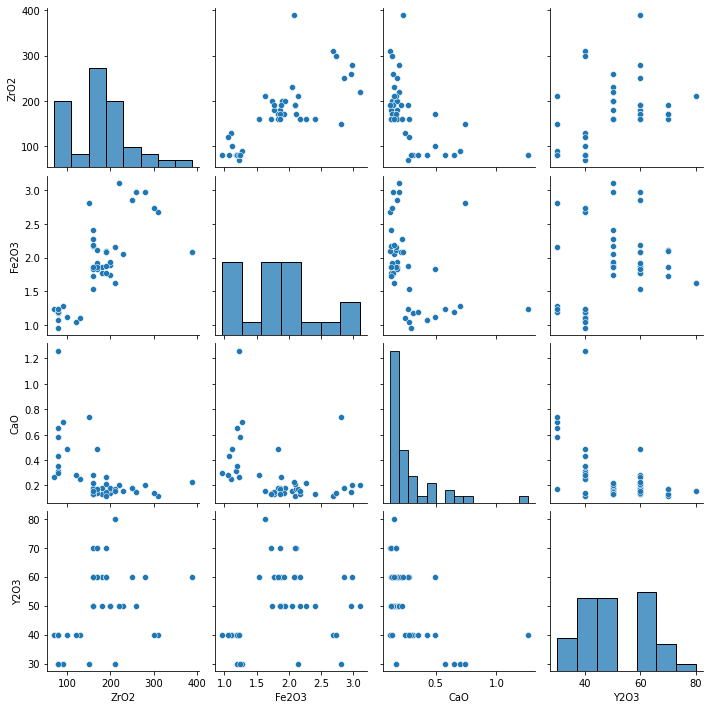

In [ ]:
sns.pairplot(body_best_atr)

Ahora tomamos los cuatro atributos con mayor significancia en el apartado de cubierta en la cerámica.

Los atributos que se van a tomar en cuenta son: SrO, ZrO2, Rb2O y Na2O

In [ ]:
glaze_best_atr = chems_glaze.loc[:, ['SrO', 'ZrO2', 'Rb2O', 'Na2O']]

In [ ]:
glaze_best_atr

,SrO,ZrO2,Rb2O,Na2O
44,150,50,310,0.97
45,250,60,350,1.46
46,90,80,370,1.05
47,160,70,330,0.14
48,80,80,320,0.37
49,240,100,360,1.09
50,240,100,380,1.16
51,160,70,180,1.01
52,190,90,230,1.88
53,180,80,330,0.73


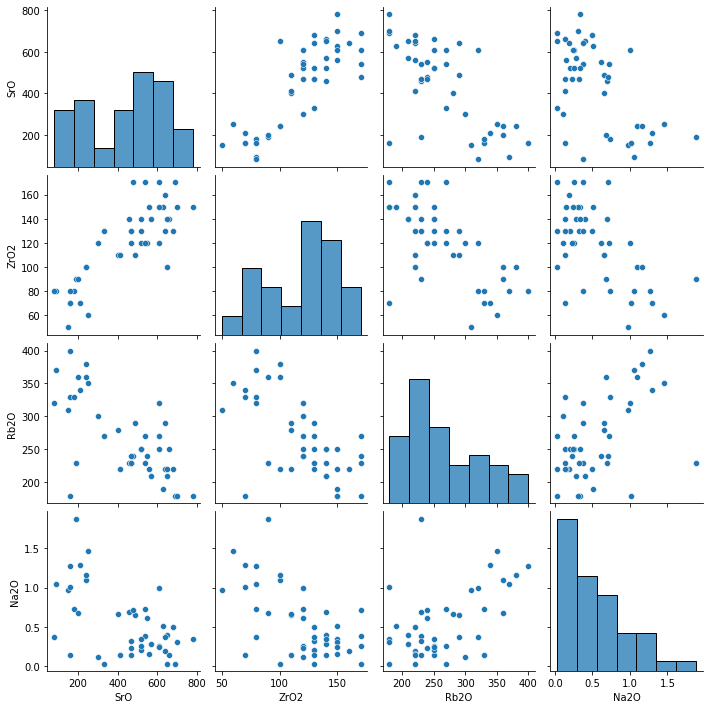

In [ ]:
sns.pairplot(glaze_best_atr)

Pasamos a normalizar ambos dataset para su aplicación de LOF

In [ ]:
body_best_atr = (body_best_atr - body_best_atr.min()) / (body_best_atr.max() - body_best_atr.min())

In [ ]:
body_best_atr

,ZrO2,Fe2O3,CaO,Y2O3
0,0.03125,0.102326,0.166667,0.2
1,0.09375,0.074419,0.324561,0.2
2,0.03125,0.051163,0.271930,0.2
3,0.00000,0.125581,0.131579,0.2
4,0.03125,0.106977,0.464912,0.0
5,0.03125,0.000000,0.157895,0.2
6,0.06250,0.148837,0.508772,0.0
7,0.03125,0.111628,0.201754,0.2
8,0.25000,0.860465,0.543860,0.0
9,0.18750,0.065116,0.114035,0.2


In [ ]:
glaze_best_atr = (glaze_best_atr - glaze_best_atr.min()) / (glaze_best_atr.max() - glaze_best_atr.min())

In [ ]:
glaze_best_atr

,SrO,ZrO2,Rb2O,Na2O
44,0.100000,0.000000,0.590909,0.508108
45,0.242857,0.083333,0.772727,0.772973
46,0.014286,0.250000,0.863636,0.551351
47,0.114286,0.166667,0.681818,0.059459
48,0.000000,0.250000,0.636364,0.183784
49,0.228571,0.416667,0.818182,0.572973
50,0.228571,0.416667,0.909091,0.610811
51,0.114286,0.166667,0.000000,0.529730
52,0.157143,0.333333,0.227273,1.000000
53,0.142857,0.250000,0.681818,0.378378


Ahora pasamos a aplicar LOF mediante la biblioteca sklearn, los parámetros que se le pasarán al modelo es la métrica a utilizar, la cual va a ser euclidiana. El tipo de algoritmo a utilizar va a ser por fuerza bruta, ya que al ser pocos atributos y pocos vectores no llevará mucho procesamiento. Vamos a utilizar un k = 3, k = 5 y k = 10 para poder observar las diferencias que hay entre los distintos valores de k.

# k = 3

In [ ]:
body_LOF_k3 = LocalOutlierFactor(n_neighbors=3, algorithm='brute', metric='euclidean')
body_outlier_k3 = body_LOF_k3.fit_predict(body_best_atr)

In [ ]:
body_LOF_outlier_k3 = pd.DataFrame.copy(body_best_atr, deep=True)

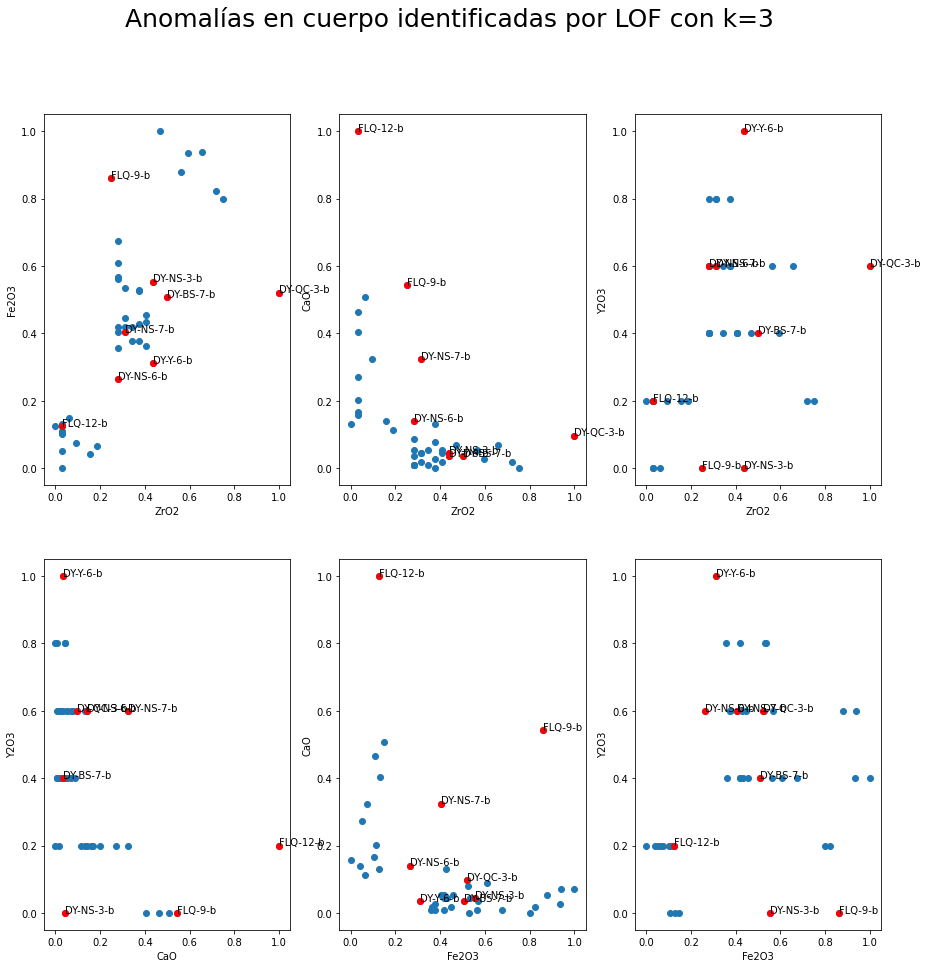

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
fig.suptitle('Anomalías en cuerpo identificadas por LOF con k=3', fontsize = 25)
list_outlier = body_LOF_outlier_k3.iloc[body_outlier_k3 == -1].index

for atr1 in range(body_LOF_outlier_k3.shape[1]):
    for atr2 in range(atr1+1, body_LOF_outlier_k3.shape[1]):
        plot_row = atr1
        plot_col = atr2-1
        if atr1 == 2 and atr2 == 3:
            plot_row = 1
            plot_col = 0
        ax[plot_row][plot_col].scatter(body_LOF_outlier_k3.iloc[:, atr1], body_LOF_outlier_k3.iloc[:, atr2])
        ax[plot_row][plot_col].set_xlabel(list(body_LOF_outlier_k3.columns)[atr1])
        ax[plot_row][plot_col].set_ylabel(list(body_LOF_outlier_k3.columns)[atr2])
        
        for outlier in list_outlier:
            ax[plot_row][plot_col].scatter(body_LOF_outlier_k3.loc[outlier, body_LOF_outlier_k3.columns[atr1]], 
                                            body_LOF_outlier_k3.loc[outlier, body_LOF_outlier_k3.columns[atr2]], 
                                            c='red')
            ax[plot_row][plot_col].text(body_LOF_outlier_k3.loc[outlier, body_LOF_outlier_k3.columns[atr1]], 
                                            body_LOF_outlier_k3.loc[outlier, body_LOF_outlier_k3.columns[atr2]], 
                                            chems_pd.loc[outlier, "Ceramic Name"])

Por lo tanto, las anomalías detectadas por LOF con k=3 en el cuerpo de las cerámicas son:


In [ ]:
list_outlier = body_LOF_outlier_k3.iloc[body_outlier_k3 == -1].index
for outlier in list_outlier:
            print(chems_pd.loc[outlier, "Ceramic Name"])

FLQ-9-b
FLQ-12-b
DY-BS-7-b
DY-NS-3-b
DY-NS-6-b
DY-NS-7-b
DY-Y-6-b
DY-QC-3-b


In [ ]:
glaze_LOF_k3 = LocalOutlierFactor(n_neighbors=3, algorithm='brute', metric='euclidean')
glaze_outlier_k3 = glaze_LOF_k3.fit_predict(glaze_best_atr)

In [ ]:
glaze_LOF_outlier_k3 = pd.DataFrame.copy(glaze_best_atr, deep=True)

Graficamos las anomalías identificadas por medio de LOF en la cubierta de la cerámica.

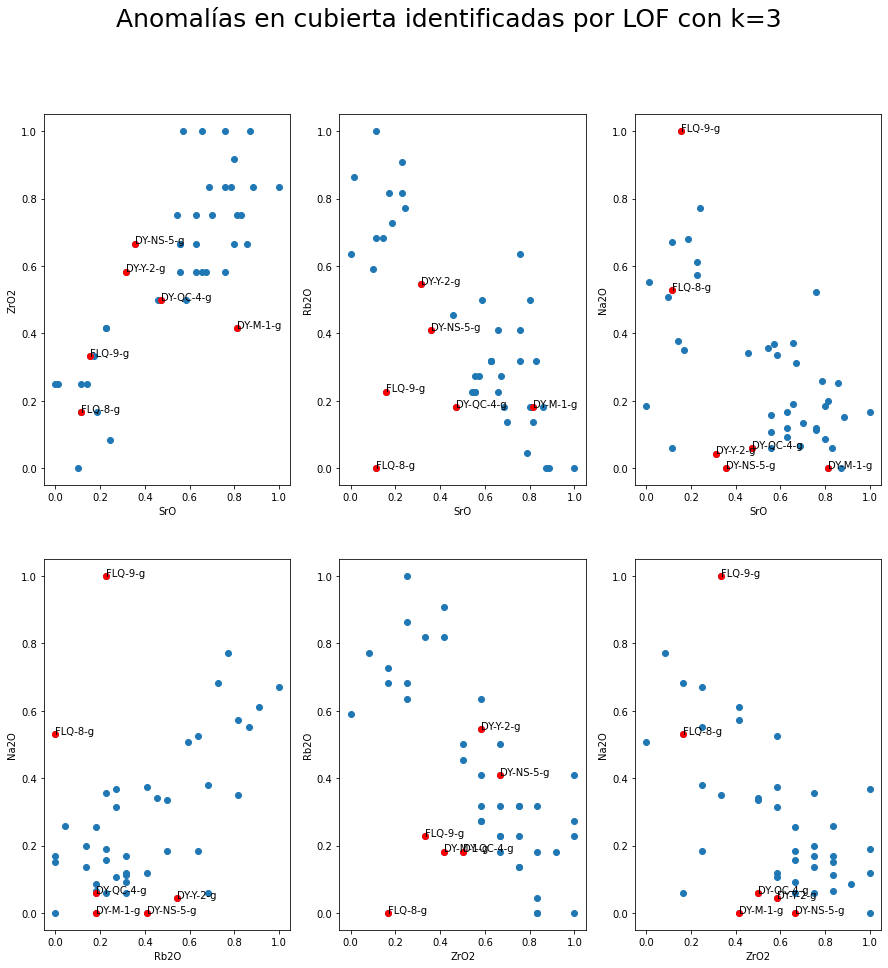

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
fig.suptitle('Anomalías en cubierta identificadas por LOF con k=3', fontsize = 25)
list_outlier = glaze_LOF_outlier_k3.iloc[glaze_outlier_k3 == -1].index

for atr1 in range(glaze_LOF_outlier_k3.shape[1]):
    for atr2 in range(atr1+1, glaze_LOF_outlier_k3.shape[1]):
        plot_row = atr1
        plot_col = atr2-1
        if atr1 == 2 and atr2 == 3:
            plot_row = 1
            plot_col = 0
        ax[plot_row][plot_col].scatter(glaze_LOF_outlier_k3.iloc[:, atr1], glaze_LOF_outlier_k3.iloc[:, atr2])
        ax[plot_row][plot_col].set_xlabel(list(glaze_LOF_outlier_k3.columns)[atr1])
        ax[plot_row][plot_col].set_ylabel(list(glaze_LOF_outlier_k3.columns)[atr2])
        
        for outlier in list_outlier:
            ax[plot_row][plot_col].scatter(glaze_LOF_outlier_k3.loc[outlier, glaze_LOF_outlier_k3.columns[atr1]], 
                                            glaze_LOF_outlier_k3.loc[outlier, glaze_LOF_outlier_k3.columns[atr2]], 
                                            c='red')
            ax[plot_row][plot_col].text(glaze_LOF_outlier_k3.loc[outlier, glaze_LOF_outlier_k3.columns[atr1]], 
                                            glaze_LOF_outlier_k3.loc[outlier, glaze_LOF_outlier_k3.columns[atr2]], 
                                            chems_pd.loc[outlier, "Ceramic Name"])

Por lo tanto, las anomalías detectadas por LOF con k=3 en la cubierta de las cerámicas son:

In [ ]:
list_outlier = glaze_LOF_outlier_k3.iloc[glaze_outlier_k3 == -1].index
for outlier in list_outlier:
            print(chems_pd.loc[outlier, "Ceramic Name"])

FLQ-8-g
FLQ-9-g
DY-NS-5-g
DY-Y-2-g
DY-M-1-g
DY-QC-4-g




---

# k = 5





In [ ]:
body_LOF_k5 = LocalOutlierFactor(n_neighbors=5, algorithm='brute', metric='euclidean')
body_outlier_k5 = body_LOF_k5.fit_predict(body_best_atr)
body_LOF_outlier_k5 = pd.DataFrame.copy(body_best_atr, deep=True)

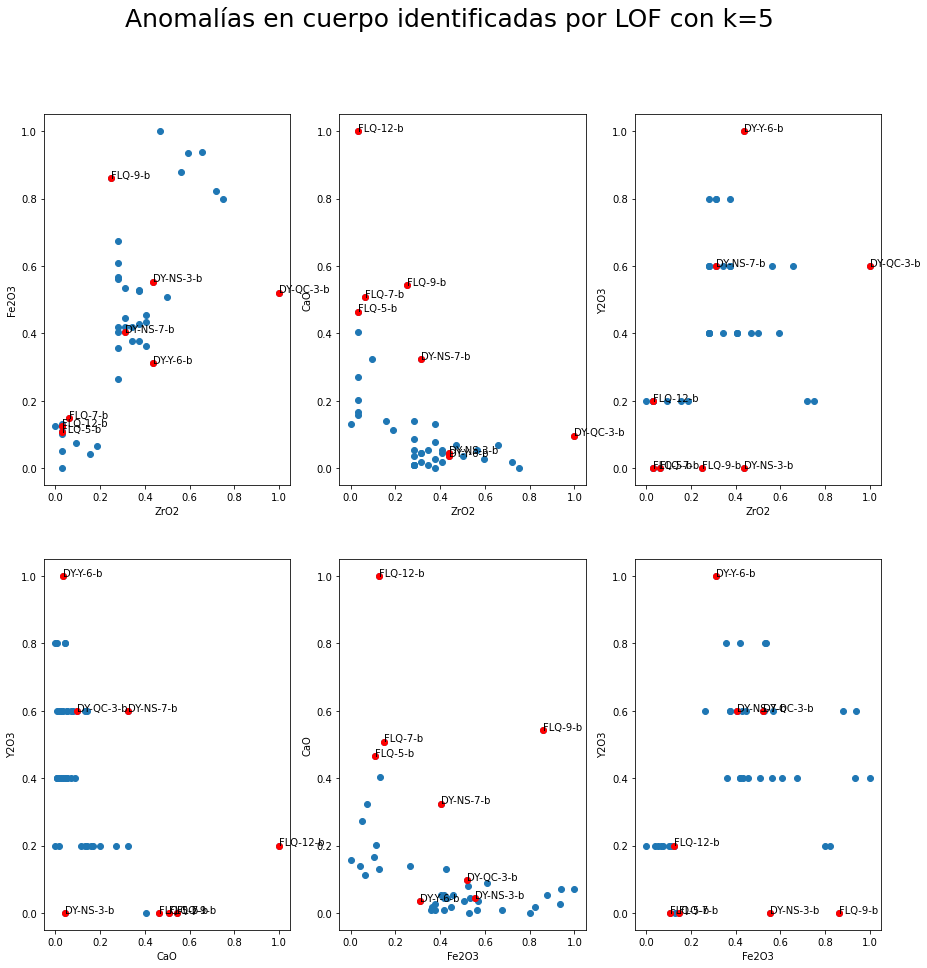

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
fig.suptitle('Anomalías en cuerpo identificadas por LOF con k=5', fontsize = 25)
list_outlier = body_LOF_outlier_k5.iloc[body_outlier_k5 == -1].index

for atr1 in range(body_LOF_outlier_k5.shape[1]):
    for atr2 in range(atr1+1, body_LOF_outlier_k5.shape[1]):
        plot_row = atr1
        plot_col = atr2-1
        if atr1 == 2 and atr2 == 3:
            plot_row = 1
            plot_col = 0
        ax[plot_row][plot_col].scatter(body_LOF_outlier_k5.iloc[:, atr1], body_LOF_outlier_k5.iloc[:, atr2])
        ax[plot_row][plot_col].set_xlabel(list(body_LOF_outlier_k5.columns)[atr1])
        ax[plot_row][plot_col].set_ylabel(list(body_LOF_outlier_k5.columns)[atr2])
        
        for outlier in list_outlier:
            ax[plot_row][plot_col].scatter(body_LOF_outlier_k5.loc[outlier, body_LOF_outlier_k5.columns[atr1]], 
                                            body_LOF_outlier_k5.loc[outlier, body_LOF_outlier_k5.columns[atr2]], 
                                            c='red')
            ax[plot_row][plot_col].text(body_LOF_outlier_k5.loc[outlier, body_LOF_outlier_k5.columns[atr1]], 
                                            body_LOF_outlier_k5.loc[outlier, body_LOF_outlier_k5.columns[atr2]], 
                                            chems_pd.loc[outlier, "Ceramic Name"])

Por lo tanto, las anomalías detectadas por LOF con k=5 en el cuerpo de las cerámicas son:



In [ ]:
list_outlier = body_LOF_outlier_k5.iloc[body_outlier_k5 == -1].index
for outlier in list_outlier:
            print(chems_pd.loc[outlier, "Ceramic Name"])

FLQ-5-b
FLQ-7-b
FLQ-9-b
FLQ-12-b
DY-NS-3-b
DY-NS-7-b
DY-Y-6-b
DY-QC-3-b


In [ ]:
glaze_LOF_k5 = LocalOutlierFactor(n_neighbors=5, algorithm='brute', metric='euclidean')
glaze_outlier_k5 = glaze_LOF_k5.fit_predict(glaze_best_atr)
glaze_LOF_outlier_k5 = pd.DataFrame.copy(glaze_best_atr, deep=True)

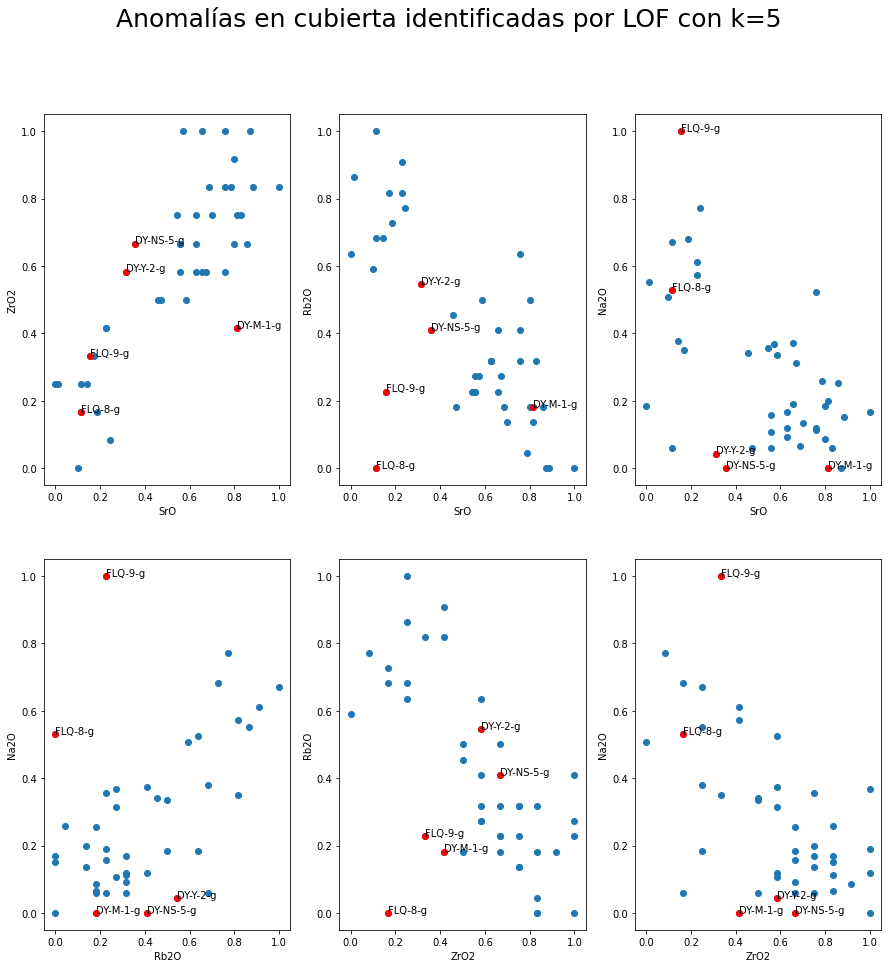

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
fig.suptitle('Anomalías en cubierta identificadas por LOF con k=5', fontsize = 25)
list_outlier = glaze_LOF_outlier_k5.iloc[glaze_outlier_k5 == -1].index

for atr1 in range(glaze_LOF_outlier_k5.shape[1]):
    for atr2 in range(atr1+1, glaze_LOF_outlier_k5.shape[1]):
        plot_row = atr1
        plot_col = atr2-1
        if atr1 == 2 and atr2 == 3:
            plot_row = 1
            plot_col = 0
        ax[plot_row][plot_col].scatter(glaze_LOF_outlier_k5.iloc[:, atr1], glaze_LOF_outlier_k5.iloc[:, atr2])
        ax[plot_row][plot_col].set_xlabel(list(glaze_LOF_outlier_k5.columns)[atr1])
        ax[plot_row][plot_col].set_ylabel(list(glaze_LOF_outlier_k5.columns)[atr2])
        
        for outlier in list_outlier:
            ax[plot_row][plot_col].scatter(glaze_LOF_outlier_k5.loc[outlier, glaze_LOF_outlier_k5.columns[atr1]], 
                                            glaze_LOF_outlier_k5.loc[outlier, glaze_LOF_outlier_k5.columns[atr2]], 
                                            c='red')
            ax[plot_row][plot_col].text(glaze_LOF_outlier_k5.loc[outlier, glaze_LOF_outlier_k5.columns[atr1]], 
                                            glaze_LOF_outlier_k5.loc[outlier, glaze_LOF_outlier_k5.columns[atr2]], 
                                            chems_pd.loc[outlier, "Ceramic Name"])

In [ ]:
list_outlier = glaze_LOF_outlier_k5.iloc[glaze_outlier_k5 == -1].index
for outlier in list_outlier:
            print(chems_pd.loc[outlier, "Ceramic Name"])

FLQ-8-g
FLQ-9-g
DY-NS-5-g
DY-Y-2-g
DY-M-1-g




---

# k = 10

In [ ]:
body_LOF_k10 = LocalOutlierFactor(n_neighbors=10, algorithm='brute', metric='euclidean')
body_outlier_k10 = body_LOF_k10.fit_predict(body_best_atr)
body_LOF_outlier_k10 = pd.DataFrame.copy(body_best_atr, deep=True)

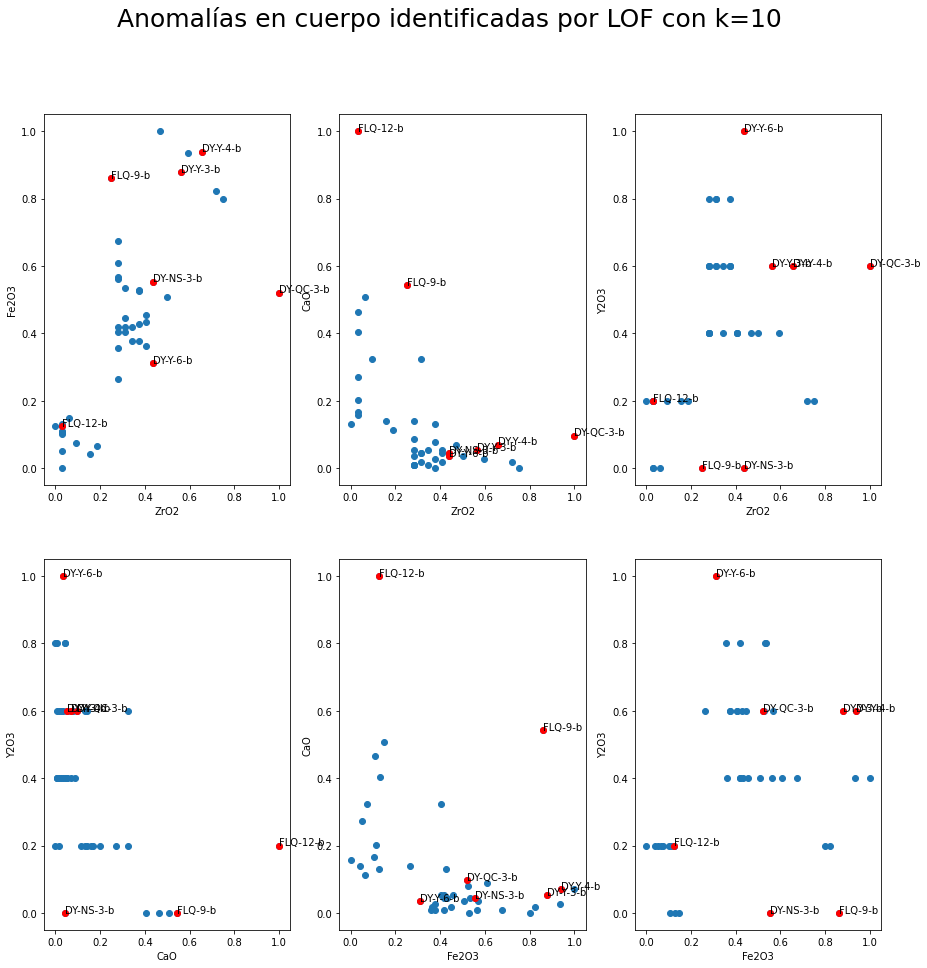

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
fig.suptitle('Anomalías en cuerpo identificadas por LOF con k=10', fontsize = 25)
list_outlier = body_LOF_outlier_k10.iloc[body_outlier_k10 == -1].index

for atr1 in range(body_LOF_outlier_k10.shape[1]):
    for atr2 in range(atr1+1, body_LOF_outlier_k10.shape[1]):
        plot_row = atr1
        plot_col = atr2-1
        if atr1 == 2 and atr2 == 3:
            plot_row = 1
            plot_col = 0
        ax[plot_row][plot_col].scatter(body_LOF_outlier_k10.iloc[:, atr1], body_LOF_outlier_k10.iloc[:, atr2])
        ax[plot_row][plot_col].set_xlabel(list(body_LOF_outlier_k10.columns)[atr1])
        ax[plot_row][plot_col].set_ylabel(list(body_LOF_outlier_k10.columns)[atr2])
        
        for outlier in list_outlier:
            ax[plot_row][plot_col].scatter(body_LOF_outlier_k10.loc[outlier, body_LOF_outlier_k10.columns[atr1]], 
                                            body_LOF_outlier_k10.loc[outlier, body_LOF_outlier_k10.columns[atr2]], 
                                            c='red')
            ax[plot_row][plot_col].text(body_LOF_outlier_k10.loc[outlier, body_LOF_outlier_k10.columns[atr1]], 
                                            body_LOF_outlier_k10.loc[outlier, body_LOF_outlier_k10.columns[atr2]], 
                                            chems_pd.loc[outlier, "Ceramic Name"])

In [ ]:
list_outlier = body_LOF_outlier_k10.iloc[body_outlier_k10 == -1].index
for outlier in list_outlier:
            print(chems_pd.loc[outlier, "Ceramic Name"])

FLQ-9-b
FLQ-12-b
DY-NS-3-b
DY-Y-3-b
DY-Y-4-b
DY-Y-6-b
DY-QC-3-b


In [ ]:
glaze_LOF_k10 = LocalOutlierFactor(n_neighbors=10, algorithm='brute', metric='euclidean')
glaze_outlier_k10 = glaze_LOF_k10.fit_predict(glaze_best_atr)
glaze_LOF_outlier_k10 = pd.DataFrame.copy(glaze_best_atr, deep=True)

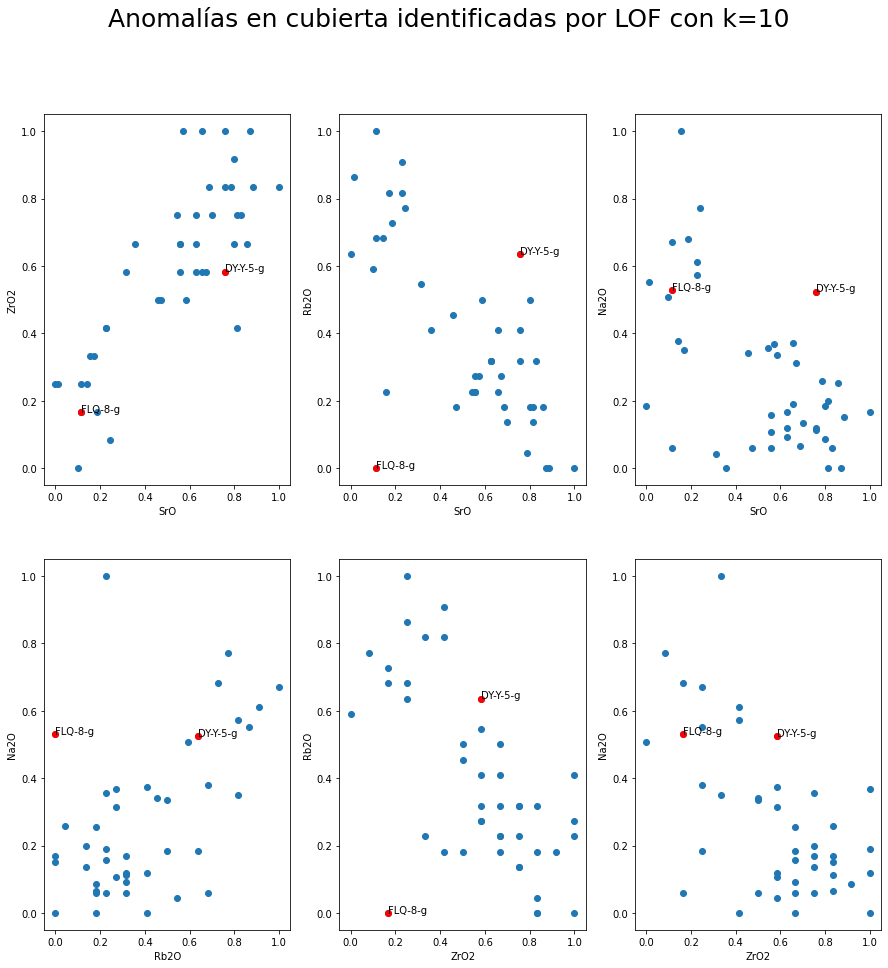

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
fig.suptitle('Anomalías en cubierta identificadas por LOF con k=10', fontsize = 25)
list_outlier = glaze_LOF_outlier_k10.iloc[glaze_outlier_k10 == -1].index

for atr1 in range(glaze_LOF_outlier_k10.shape[1]):
    for atr2 in range(atr1+1, glaze_LOF_outlier_k10.shape[1]):
        plot_row = atr1
        plot_col = atr2-1
        if atr1 == 2 and atr2 == 3:
            plot_row = 1
            plot_col = 0
        ax[plot_row][plot_col].scatter(glaze_LOF_outlier_k10.iloc[:, atr1], glaze_LOF_outlier_k10.iloc[:, atr2])
        ax[plot_row][plot_col].set_xlabel(list(glaze_LOF_outlier_k10.columns)[atr1])
        ax[plot_row][plot_col].set_ylabel(list(glaze_LOF_outlier_k10.columns)[atr2])
        
        for outlier in list_outlier:
            ax[plot_row][plot_col].scatter(glaze_LOF_outlier_k10.loc[outlier, glaze_LOF_outlier_k10.columns[atr1]], 
                                            glaze_LOF_outlier_k10.loc[outlier, glaze_LOF_outlier_k10.columns[atr2]], 
                                            c='red')
            ax[plot_row][plot_col].text(glaze_LOF_outlier_k10.loc[outlier, glaze_LOF_outlier_k10.columns[atr1]], 
                                            glaze_LOF_outlier_k10.loc[outlier, glaze_LOF_outlier_k10.columns[atr2]], 
                                            chems_pd.loc[outlier, "Ceramic Name"])

In [ ]:
list_outlier = glaze_LOF_outlier_k10.iloc[glaze_outlier_k10 == -1].index
for outlier in list_outlier:
            print(chems_pd.loc[outlier, "Ceramic Name"])

FLQ-8-g
DY-Y-5-g
